<a href="https://colab.research.google.com/github/cher16/FDSfE_ANjoku/blob/main/HW5/HW5_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [229]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import pylab as plt
import statsmodels.api as sm

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [230]:
realest = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")
realest

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


In [231]:
realest.shape

(414, 5)

In [232]:
print("The number of rows in the dataframe are "+ format(realest.shape[0]) + " and the number of columns in the dataframe are "+format(realest.shape[1]))

The number of rows in the dataframe are 414 and the number of columns in the dataframe are 5


In [233]:
realest.describe()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,37.980193
std,0.281967,11.392485,1262.109595,2.945562,13.606488
min,2012.667000,0.000000,23.382840,0.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,117.500000


In [234]:
realest.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [235]:
realest.tail()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5
413,2013.500,6.5,90.45606,9,63.9


In [236]:
realest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transaction_date              414 non-null    float64
 1   house_age                     414 non-null    float64
 2   distance_nearest_MRT_station  414 non-null    float64
 3   convenience_stores            414 non-null    int64  
 4   house_price_unit_area         414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [237]:
realest["log10distance_nearest_MRT_station"] = np.log10(realest["distance_nearest_MRT_station"])
realest

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log10distance_nearest_MRT_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4,3.610875
410,2012.667,5.6,90.45606,9,50.0,1.956438
411,2013.250,18.8,390.96960,7,40.6,2.592143
412,2013.000,8.1,104.81010,5,52.5,2.020403


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [238]:
log10distance = realest["log10distance_nearest_MRT_station"]
log10distance

0      1.928799
1      2.486565
2      2.749724
3      2.749724
4      2.591697
         ...   
409    3.610875
410    1.956438
411    2.592143
412    2.020403
413    1.956438
Name: log10distance_nearest_MRT_station, Length: 414, dtype: float64

Using the code library of your choice, fit a linear regression model to the data

In [239]:
feature = realest [["log10distance_nearest_MRT_station"]]
target = realest["house_price_unit_area"]

In [240]:
feature.shape

(414, 1)

In [241]:
target.shape

(414,)

In [242]:
slr = LinearRegression()

In [243]:
slr.fit(feature,target)

LinearRegression()

In [244]:
slr.intercept_

95.01686471224157

In [351]:
slr.coef_

array([-20.54720171])

In [245]:
realest["prediction"] = slr.predict(feature)

In [246]:
realest.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log10distance_nearest_MRT_station,prediction
0,2012.917,32.0,84.87882,10,37.9,1.928799,55.385436
1,2012.917,19.5,306.59470,9,42.2,2.486565,43.924919
2,2013.583,13.3,561.98450,5,47.3,2.749724,38.517724
3,2013.500,13.3,561.98450,5,54.8,2.749724,38.517724
4,2012.833,5.0,390.56840,5,43.1,2.591697,41.764742


*shows the insertion of a new column "prediction"*

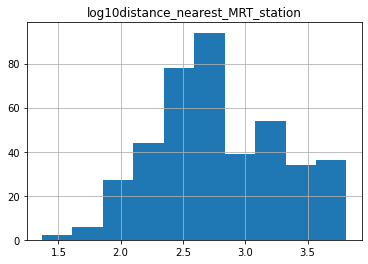

In [247]:
feature.hist();

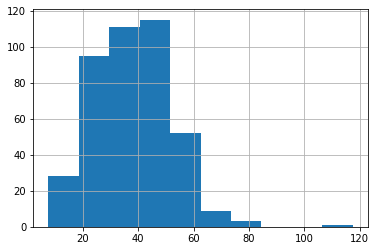

In [248]:
target.hist();

In [289]:
feature_s = (feature - feature.mean()) / feature.std()
target_s = (target - target.mean()) / target.std()

In [284]:
feature_s.shape

(414, 1)

In [285]:
t =target_s.values.reshape(-1,1)

In [292]:
slr_s = LinearRegression()

In [293]:
slr_s.fit(feature_s, t)

LinearRegression()

In [352]:
slr_s.intercept_[0]

-7.789490616431278e-17

In [312]:
slr_s.score(feature_s, target_s)

0.5392532390657542

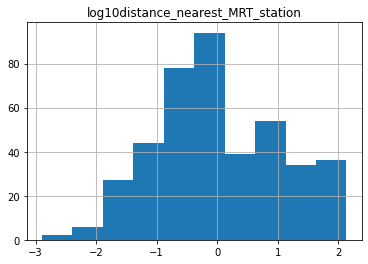

In [313]:
feature_s.hist();

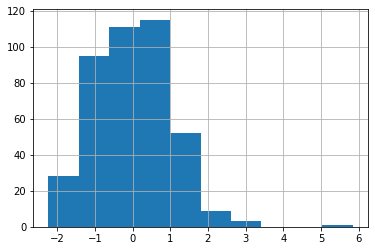

In [314]:
target_s.hist();

Print both the $R^2$ and Adjusted-$R^2$ of this model 

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [315]:
r2 = slr.score(feature, target)
r2

0.5392532390657542

In [316]:
print("The r^2 score of the model is {0:.3f}".format(r2))

The r^2 score of the model is 0.539


In [317]:
x= feature
y = target
x= sm.add_constant(x)
x.head()
model1 = sm.OLS(y,x)
results = model1.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     house_price_unit_area   R-squared:                       0.539
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     482.2
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):           2.52e-71
Time:                           03:33:31   Log-Likelihood:                -1507.3
No. Observations:                    414   AIC:                             3019.
Df Residuals:                        412   BIC:                             3027.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [318]:
print("The adjusted r^2 value for the model is 0.538")

The adjusted r^2 value for the model is 0.538


Print the coefficient (slope) of the line

In [354]:
slr_s.coef_[0,0]

-0.7343386405914879

In [355]:
print("The coefficient of the line is {0:.3f}".format(slr_s.coef_[0,0]))

The coefficient of the line is -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

*The relationship between the feature and the target variable is weak*

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

In [341]:
realest["prediction"] = slr_s.predict(feature_s)

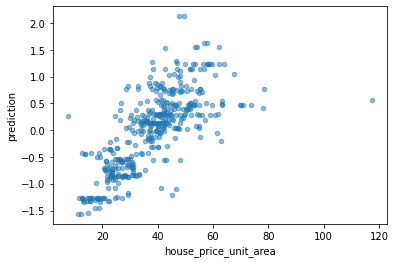

In [342]:
realest.plot("house_price_unit_area", "prediction", kind = "scatter", alpha = 0.5);

***Graph of prediction against house_price_unit_area***

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [259]:
features = realest.loc[:, ~realest.columns.isin(['distance_nearest_MRT_station', 'house_price_unit_area', 'prediction'])]
targetm = realest['house_price_unit_area']

Using the code library of your choice, fit a multiple linear regression model to the data

In [260]:
mlr = LinearRegression()

In [261]:
mlr.fit(features, targetm)

LinearRegression()

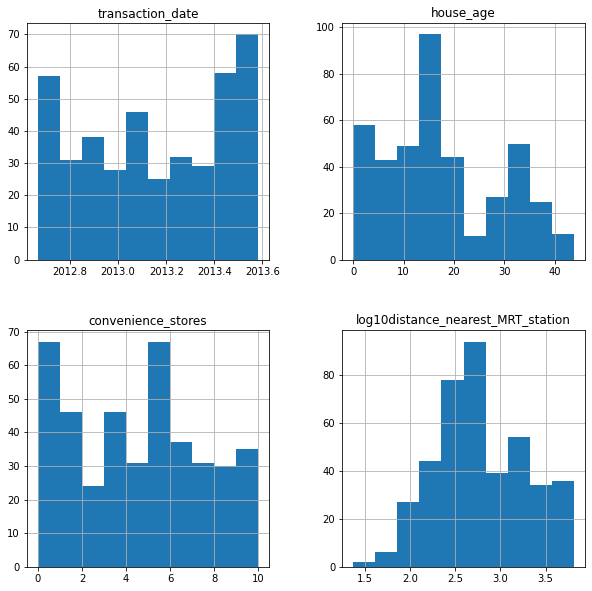

In [263]:
features.hist(figsize=(10,10));

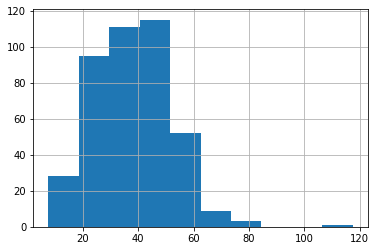

In [264]:
targetm.hist();

In [265]:
features_s = (features - features.mean()) / features.std()
targetm_s = (targetm - targetm.mean()) / targetm.std()

In [303]:
mlr_s = LinearRegression()

In [304]:
mlr_s.fit(features_s, targetm_s)

LinearRegression()

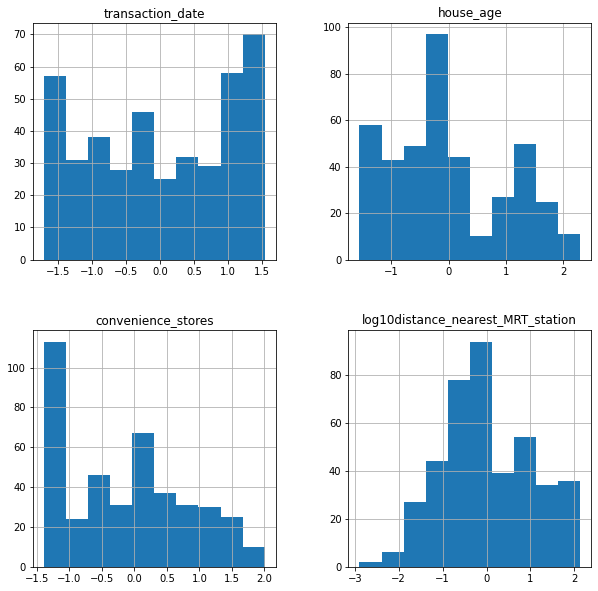

In [266]:
features_s.hist(figsize=(10,10));

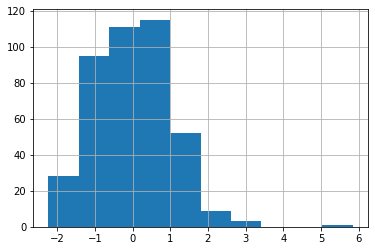

In [267]:
targetm_s.hist();

Print the coefficients of each of the features

In [346]:
mlr_s.coef_

array([ 0.152125  , -0.17676128,  0.13747018, -0.64307016])

In [350]:
print("The coefficient of the features are")
for i in range(0, 4):
  print("\n %(f)s with %(c)s " % {'f':features.columns[i], 'c':mlr_s.coef_[i]})



The coefficient of the features are

 transaction_date with 0.15212499660260398 

 house_age with -0.17676128176532313 

 convenience_stores with 0.13747017860702465 

 log10distance_nearest_MRT_station with -0.6430701557791013 


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

*The features transaction_date and convenience_stores have a stronger correlation to the target variable as their values are closer to 1 while the rest of the features have a weaker correlation*

Print the $R^2$ of this model

In [301]:
print("The r^2 score of the model is {0:.3f}".format(mlr.score(features, targetm)))

The r^2 score of the model is 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*Yes, because of the change in r^2 value showing a higher r^2 value*

Print the Adjusted-$R^2$ of this model

In [271]:
x= features
y = targetm
x= sm.add_constant(x)
x.head()
model1 = sm.OLS(y,x)
results = model1.fit()
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     house_price_unit_area   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.597
Method:                    Least Squares   F-statistic:                     154.2
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):           2.72e-80
Time:                           03:06:42   Log-Likelihood:                -1477.4
No. Observations:                    414   AIC:                             2965.
Df Residuals:                        409   BIC:                             2985.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [272]:
print("The adjusted r^2 value for this model is 0.597")

The adjusted r^2 value for this model is 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*It would appear that the model has improved with the addition of the remaining features as the r^2 and adjusted r^2 values are slightly higher compared to the model in task 1*

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2? 

In [344]:
realest["prediction2"] = mlr_s.predict(features_s)

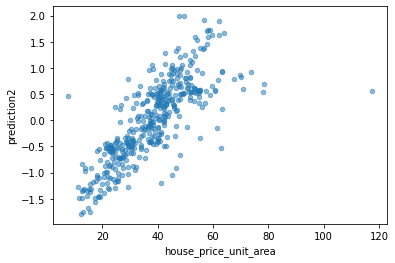

In [345]:
realest.plot("house_price_unit_area", "prediction2", kind = "scatter", alpha = 0.5);

***Graph of prediction2 against house_price_unit_area***